In [ ]:
#Salary Prediction With Machine Learning Algorithm for Regression Problems

# İş Problemi : Maaş bilgileri ve 1986 yılına ait kariyer istatistikleri paylaşılan beyzbol 
# oyuncularının maaş tahminleri için bir makine öğrenmesi projesi gerçekleştirilebilir mi?

# VERİ SETİ HİKAYESİ 
# Bu veri seti orijinal olarak Carnegie Mellon Üniversitesi'nde bulunan StatLib kütüphanesinden 
# alınmıştır. Veri seti 1988 ASA Grafik Bölümü Poster Oturumu'nda kullanılan verilerin bir
# parçasıdır. Maaş verileri orijinal olarak Sports Illustrated, 20 Nisan 1987'den alınmıştır.
# 1986 ve kariyer istatistikleri, Collier Books, Macmillan Publishing Company, New York tarafından 
# yayınlanan 1987 Beyzbol Ansiklopedisi Güncellemesinden elde edilmiştir.

# DEĞİŞKENLER 
# AtBat: 1986-1987 sezonunda bir beyzbol sopası ile topa yapılan vuruş sayısı
# Hits: 1986-1987 sezonundaki isabet sayısı
# HmRun: 1986-1987 sezonundaki en değerli vuruş sayısı
# Runs: 1986-1987 sezonunda takımına kazandırdığı sayı
# RBI: Bir vurucunun vuruş yaptıgında koşu yaptırdığı oyuncu sayısı
# Walks: Karşı oyuncuya yaptırılan hata sayısı
# Years: Oyuncunun major liginde oynama süresi (sene)
# CAtBat: Oyuncunun kariyeri boyunca topa vurma sayısı
# CHits: Oyuncunun kariyeri boyunca yaptığı isabetli vuruş sayısı
# CHmRun: Oyucunun kariyeri boyunca yaptığı en değerli sayısı
# CRuns: Oyuncunun kariyeri boyunca takımına kazandırdığı sayı
# CRBI: Oyuncunun kariyeri boyunca koşu yaptırdırdığı oyuncu sayısı
# CWalks: Oyuncun kariyeri boyunca karşı oyuncuya yaptırdığı hata sayısı
# League: Oyuncunun sezon sonuna kadar oynadığı ligi gösteren A ve N seviyelerine sahip bir faktör
# Division: 1986 sonunda oyuncunun oynadığı pozisyonu gösteren E ve W seviyelerine sahip bir faktör
# PutOuts: Oyun icinde takım arkadaşınla yardımlaşma
# Assits: 1986-1987 sezonunda oyuncunun yaptığı asist sayısı
# Errors: 1986-1987 sezonundaki oyuncunun hata sayısı
# NewLeague: 1987 sezonunun başında oyuncunun ligini gösteren A ve N seviyelerine sahip bir faktör
# Salary: Oyuncunun 1986-1987 sezonunda aldığı maaş(bin uzerinden) ( BAĞIMLI DEĞİŞKEN )

In [250]:
# İlgili kütüphaneler


import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=Warning)
from lightgbm import LGBMRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.exceptions import ConvergenceWarning
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_validate
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_auc_score, \
    roc_auc_score, confusion_matrix, classification_report, plot_roc_curve, mean_squared_error, mean_absolute_error



warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore", category=ConvergenceWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore", category=ConvergenceWarning)


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [251]:
df = pd.read_csv("/kaggle/input/hitters/hitters.csv")
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.000,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.000,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.000,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.500,N


In [252]:
df.shape

(322, 20)

In [253]:
# VERİ SETİ GENEL RESİM

def check_df(dataframe):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(3))
    print("##################### Tail #####################")
    print(dataframe.tail(3))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print("##################### Quantiles #####################")
    print(dataframe.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)
    
check_df(df)

##################### Shape #####################
(322, 20)
##################### Types #####################
AtBat          int64
Hits           int64
HmRun          int64
Runs           int64
RBI            int64
Walks          int64
Years          int64
CAtBat         int64
CHits          int64
CHmRun         int64
CRuns          int64
CRBI           int64
CWalks         int64
League        object
Division      object
PutOuts        int64
Assists        int64
Errors         int64
Salary       float64
NewLeague     object
dtype: object
##################### Head #####################
   AtBat  Hits  HmRun  Runs  RBI  Walks  Years  CAtBat  CHits  CHmRun  CRuns  \
0    293    66      1    30   29     14      1     293     66       1     30   
1    315    81      7    24   38     39     14    3449    835      69    321   
2    479   130     18    66   72     76      3    1624    457      63    224   

   CRBI  CWalks League Division  PutOuts  Assists  Errors  Salary NewLeague  
0    29 

In [254]:
# NUMERİK VE KATEGORİK DEĞİŞKENLERİN YAKALANMASI

def grab_col_names(dataframe, cat_th=10, car_th=20):
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]

    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]

    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]

    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')

    return cat_cols, cat_but_car, num_cols, num_but_cat

cat_cols, cat_but_car, num_cols, num_but_cat = grab_col_names(df)

Observations: 322
Variables: 20
cat_cols: 3
num_cols: 17
cat_but_car: 0
num_but_cat: 0


In [255]:
num_cols

['AtBat',
 'Hits',
 'HmRun',
 'Runs',
 'RBI',
 'Walks',
 'Years',
 'CAtBat',
 'CHits',
 'CHmRun',
 'CRuns',
 'CRBI',
 'CWalks',
 'PutOuts',
 'Assists',
 'Errors',
 'Salary']

In [256]:
cat_cols

['League', 'Division', 'NewLeague']

In [257]:
## KATEGORİK DEĞİŞKEN ANALİZİ

def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))

    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show()

for col in cat_cols:
    cat_summary(df, col)

   League  Ratio
A     175 54.348
N     147 45.652
   Division  Ratio
W       165 51.242
E       157 48.758
   NewLeague  Ratio
A        176 54.658
N        146 45.342


In [258]:
## SAYISAL DEĞİŞKEN ANALİZİ

def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
        dataframe[numerical_col].hist(bins=50)
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show()

    print("#####################################")

for col in num_cols:
    num_summary(df, col)

count   322.000
mean    380.929
std     153.405
min      16.000
5%      161.000
10%     194.100
20%     221.800
30%     281.300
40%     321.800
50%     379.500
60%     430.200
70%     490.000
80%     535.600
90%     584.900
95%     609.900
99%     658.590
max     687.000
Name: AtBat, dtype: float64
#####################################
count   322.000
mean    101.025
std      46.455
min       1.000
5%       39.000
10%      45.100
20%      57.000
30%      70.000
40%      82.000
50%      96.000
60%     113.000
70%     128.700
80%     144.000
90%     163.000
95%     174.000
99%     210.790
max     238.000
Name: Hits, dtype: float64
#####################################
count   322.000
mean     10.770
std       8.709
min       0.000
5%        0.000
10%       1.000
20%       3.000
30%       5.000
40%       6.000
50%       8.000
60%      10.600
70%      14.000
80%      18.000
90%      24.000
95%      28.950
99%      33.000
max      40.000
Name: HmRun, dtype: float64
#########################

In [259]:
### HEDEF DEĞİŞKEN ANALİZİ

## HEDEF DEĞİŞKENE GÖRE NUMERİK DEĞERLERİN ORTALAMASI

def target_summary_with_num(dataframe, target, numerical_col):
    print(dataframe.groupby(target).agg({numerical_col: "mean"}), end="\n\n\n")

for col in num_cols:
    target_summary_with_num(df,"Salary",col)

           AtBat
Salary          
67.500   181.000
68.000   209.000
70.000   248.600
75.000   236.400
80.000   399.000
86.500   181.000
87.500   445.000
90.000   321.833
91.500   321.000
95.000   151.000
97.500   382.000
100.000  384.167
105.000  487.000
110.000  323.000
115.000  426.000
120.000  309.500
125.000  328.000
130.000  309.000
135.000  294.000
137.000  258.000
140.000  352.000
145.000  424.500
150.000  423.000
155.000  456.000
160.000  589.000
165.000  596.500
172.000  540.000
175.000  346.000
180.000  217.000
185.000  520.000
190.000  181.000
191.000  275.000
195.000  453.000
200.000  516.000
202.500  431.000
210.000  463.500
215.000  485.333
225.000  249.500
230.000  236.000
235.000  213.000
240.000  242.000
245.000  193.000
247.500  205.000
250.000  339.833
260.000  155.000
265.000  199.000
275.000  218.000
277.500  408.000
286.667  205.000
297.500  220.000
300.000  344.800
305.000  254.000
320.000  311.000
325.000  333.000
326.667  368.000
340.000  244.000
341.667  284.5

In [260]:
# KATEGORİK DEĞİŞKENLERE GÖRE HEDEF DEĞİŞKENİN ORTALAMASI

def target_summary_with_cat(dataframe, target, categorical_col):
    print(categorical_col)
    print(pd.DataFrame({"TARGET_MEAN": dataframe.groupby(categorical_col)[target].mean(),
                        "Count": dataframe[categorical_col].value_counts(),
                        "Ratio": 100 * dataframe[categorical_col].value_counts() / len(dataframe)}), end="\n\n\n")

for col in cat_cols:
    target_summary_with_cat(df,"Salary",col)

League
   TARGET_MEAN  Count  Ratio
A      542.000    175 54.348
N      529.118    147 45.652


Division
   TARGET_MEAN  Count  Ratio
E      624.271    157 48.758
W      450.877    165 51.242


NewLeague
   TARGET_MEAN  Count  Ratio
A      537.113    176 54.658
N      534.554    146 45.342




In [261]:
# EKSİK GÖZLEM ANALİZİ

def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]

    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)

    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)

    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])

    print(missing_df, end="\n")

    if na_name:
        return na_columns

missing_values_table(df) 

        n_miss  ratio
Salary      59 18.320


In [262]:
## ilk önce eksik gözlemleri atalım

df = df.dropna()

In [263]:
df.isnull().values.any()

False

In [264]:
df.shape

(263, 20)

In [265]:
# AYKIRI GÖZLEM ANALİZİ

def outlier_thresholds(dataframe, variable, low_quantile=0.10, up_quantile=0.90):
    quantile_one = dataframe[variable].quantile(low_quantile)
    quantile_three = dataframe[variable].quantile(up_quantile)
    interquantile_range = quantile_three - quantile_one
    up_limit = quantile_three + 1.5 * interquantile_range
    low_limit = quantile_one - 1.5 * interquantile_range
    return low_limit, up_limit


def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

for col in num_cols:
    if col != "Salary":
      print(col, check_outlier(df, col))

AtBat False
Hits False
HmRun False
Runs False
RBI False
Walks False
Years False
CAtBat False
CHits True
CHmRun True
CRuns True
CRBI False
CWalks True
PutOuts False
Assists False
Errors False


In [266]:
# AYKIRI DEĞERLERİN KENDİSİNE ERİŞMEK

def grab_outliers(dataframe, col_name, index=False):   
    low, up = outlier_thresholds(dataframe, col_name)
    if dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].shape[0] > 10:
        print(dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].head())
    else:
        print(dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))])

    if index:
        outlier_index = dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].index
        return outlier_index

grab_outliers(df, "CHits")   
grab_outliers(df, "CHmRun")   
grab_outliers(df, "CRuns")    
grab_outliers(df, "CWalks")


     AtBat  Hits  HmRun  Runs  RBI  Walks  Years  CAtBat  CHits  CHmRun  \
236    237    52      0    15   25     30     24   14053   4256     160   

     CRuns  CRBI  CWalks League Division  PutOuts  Assists  Errors  Salary  \
236   2165  1314    1566      N        W      523       43       6 750.000   

    NewLeague  
236         N  
     AtBat  Hits  HmRun  Runs  RBI  Walks  Years  CAtBat  CHits  CHmRun  \
249    419   101     18    65   58     92     20    9528   2510     548   

     CRuns  CRBI  CWalks League Division  PutOuts  Assists  Errors  Salary  \
249   1509  1659    1342      A        W        0        0       0 487.500   

    NewLeague  
249         A  
     AtBat  Hits  HmRun  Runs  RBI  Walks  Years  CAtBat  CHits  CHmRun  \
236    237    52      0    15   25     30     24   14053   4256     160   

     CRuns  CRBI  CWalks League Division  PutOuts  Assists  Errors  Salary  \
236   2165  1314    1566      N        W      523       43       6 750.000   

    NewLeagu

In [267]:
## 236.gözlem ve 249.gözlemleri silelim

df = pd.DataFrame(df).drop(index=[236,249])
df = df.reset_index(drop=True)

df.shape

(261, 20)

In [268]:
def check_df(dataframe, head=5):
    print("##################### Quantiles #####################")
    print(dataframe.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)
check_df(df)

##################### Quantiles #####################
         0.000   0.050    0.500    0.950    0.990    1.000
AtBat   19.000 181.000  413.000  618.000  668.600  687.000
Hits     1.000  42.000  104.000  178.000  211.800  238.000
HmRun    0.000   1.000    9.000   29.000   33.000   40.000
Runs     0.000  20.000   52.000   97.000  111.600  130.000
RBI      0.000  18.000   47.000  100.000  114.200  121.000
Walks    0.000  12.000   37.000   78.000   94.000  105.000
Years    1.000   1.000    6.000   16.000   18.000   20.000
CAtBat  19.000 279.000 1928.000 7037.000 8407.200 8759.000
CHits    4.000  68.000  510.000 1982.000 2324.600 2583.000
CHmRun   0.000   2.000   39.000  253.000  327.800  384.000
CRuns    2.000  32.000  249.000 1008.000 1139.200 1175.000
CRBI     3.000  29.000  227.000 1032.000 1275.800 1348.000
CWalks   1.000  22.000  174.000  784.000  989.400 1380.000
PutOuts  0.000  41.000  224.000  942.000 1277.400 1377.000
Assists  0.000   1.000   46.000  442.000  480.200  492.000
Er

In [ ]:
# Çeyrekliklere göre çarpıklık barındırabilecek değişkenler PutOuts, CWalks, CRBI ve Salary.
# Bu sebeple 0.25-0.75 thresholdlar dısında kalan gözlemleri tespit etmek istiyorum.

In [269]:
def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

bd_low,bd_up = outlier_thresholds(df, "Salary")
df[(df["Salary"] < bd_low ) | (df["Salary"] > bd_up)].shape 

(11, 20)

In [270]:
# AYKIRI GÖZLEM SİLME

# Salarydeki aykırıların hepsini siliyoruz.

def remove_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    df_without_outliers = dataframe[~((dataframe[col_name] < low_limit) | (dataframe[col_name] > up_limit))]
    return df_without_outliers

df = remove_outlier(df, "Salary")

df.shape 

(250, 20)

In [271]:
bd_low,bd_up = outlier_thresholds(df, "PutOuts")
df[(df["PutOuts"] < bd_low ) | (df["PutOuts"] > bd_up)].shape 

(26, 20)

In [272]:
bd_low,bd_up = outlier_thresholds(df, "CWalks")
df[(df["CWalks"] < bd_low ) | (df["CWalks"] > bd_up)].shape 

(18, 20)

In [273]:
bd_low,bd_up = outlier_thresholds(df, "CRBI")
df[(df["CRBI"] < bd_low ) | (df["CRBI"] > bd_up)].shape  

(17, 20)

In [274]:
# AYKIRI GÖZLEM BASKILAMA

# bu 3 degısken ıcın aykırı gozlem baskılama yapıyoruz

def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

replace_with_thresholds(df, "PutOuts")
replace_with_thresholds(df, "CWalks")
replace_with_thresholds(df, "CRBI")

In [275]:
check_outlier(df, "PutOuts")

False

In [276]:
check_outlier(df, "CWalks")

False

In [277]:
check_outlier(df, "CRBI")

False

In [278]:
# 0.10-0.90 threshold bakıyoruz.

def outlier_thresholds(dataframe, variable, low_quantile=0.10, up_quantile=0.90):
    quantile_one = dataframe[variable].quantile(low_quantile)
    quantile_three = dataframe[variable].quantile(up_quantile)
    interquantile_range = quantile_three - quantile_one
    up_limit = quantile_three + 1.5 * interquantile_range
    low_limit = quantile_one - 1.5 * interquantile_range
    return low_limit, up_limit


def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

for col in num_cols:
    if col != "Salary":
      print(col, check_outlier(df, col))

AtBat False
Hits False
HmRun False
Runs False
RBI False
Walks False
Years False
CAtBat False
CHits False
CHmRun True
CRuns False
CRBI False
CWalks False
PutOuts False
Assists False
Errors False


In [279]:
bd_low,bd_up = outlier_thresholds(df, "CHmRun")
df[(df["CHmRun"] < bd_low ) | (df["CHmRun"] > bd_up)].shape

(1, 20)

In [280]:
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

replace_with_thresholds(df, "CHmRun")

In [281]:
# 0.10-0.90 threshold aykırı kontrol

for col in num_cols:
    if col != "Salary":
      print(col, check_outlier(df, col))


AtBat False
Hits False
HmRun False
Runs False
RBI False
Walks False
Years False
CAtBat False
CHits False
CHmRun False
CRuns False
CRBI False
CWalks False
PutOuts False
Assists False
Errors False


In [282]:
df.shape

(250, 20)

In [283]:
# BINARY ENCODING 

binary_cols = [col for col in df.columns if df[col].dtype not in ["int64", "float64"]
               and df[col].nunique() == 2]

def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

for col in binary_cols:
    label_encoder(df, col)


In [284]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,315,81,7,24,38,39,14,3449,835,69.000,321,414.000,375.000,1,1,624.625,43,10,475.000,1
1,479,130,18,66,72,76,3,1624,457,63.000,224,266.000,263.000,0,1,624.625,82,14,480.000,0
2,496,141,20,65,78,37,11,5628,1575,225.000,828,838.000,354.000,1,0,200.000,11,3,500.000,1
3,321,87,10,39,42,30,2,396,101,12.000,48,46.000,33.000,1,0,624.625,40,4,91.500,1
4,594,169,4,74,51,35,11,4408,1133,19.000,501,336.000,194.000,0,1,282.000,421,25,750.000,0


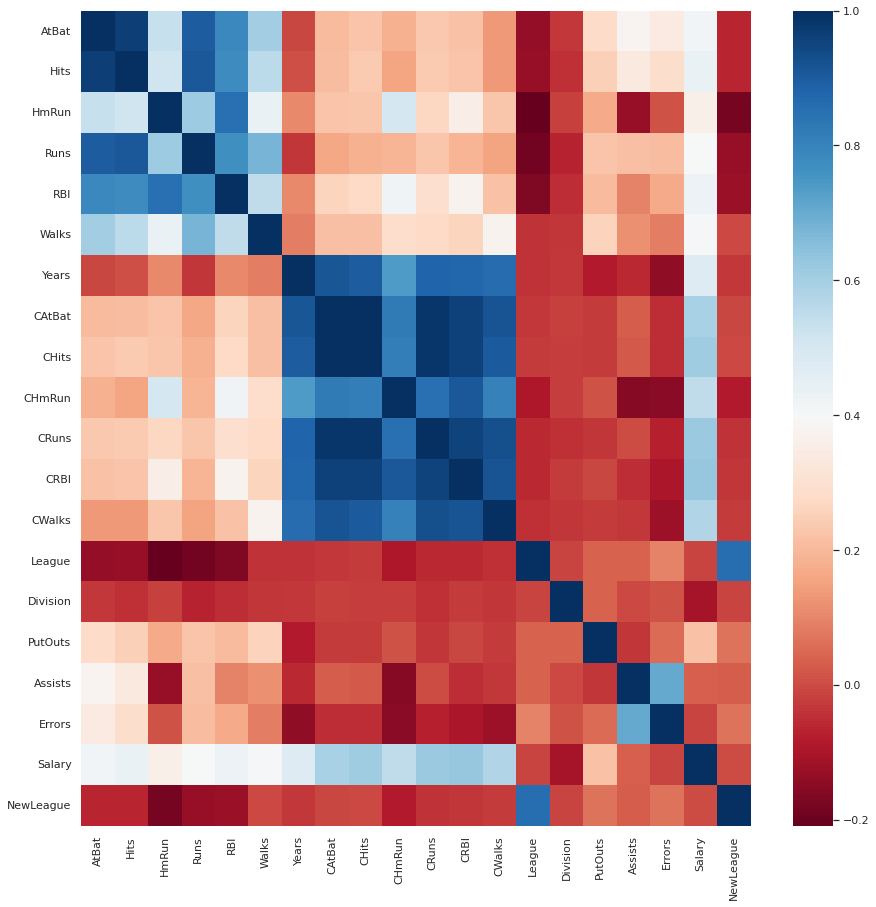

['Hits',
 'Runs',
 'RBI',
 'CAtBat',
 'CHits',
 'CHmRun',
 'CRuns',
 'CRBI',
 'CWalks',
 'Errors',
 'NewLeague']

In [285]:
# CORRELATION MATRIX

def high_correlated_cols(dataframe, plot=False, corr_th=0.70):
    corr = dataframe.corr()
    cor_matrix = corr.abs()
    upper_triangle_matrix = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(np.bool))
    drop_list = [col for col in upper_triangle_matrix.columns if any(upper_triangle_matrix[col] > corr_th)]
    if plot:
        import seaborn as sns
        import matplotlib.pyplot as plt
        sns.set(rc={'figure.figsize': (15, 15)})
        sns.heatmap(corr, cmap="RdBu")
        plt.show()
    return drop_list

high_correlated_cols(df, plot=True)

In [286]:
## BASE MODEL

y = df["Salary"]
X = df.drop(["Salary"], axis=1)

models = [('LR', LinearRegression()),
          ("Ridge", Ridge()),
          ("Lasso", Lasso()),
          ("ElasticNet", ElasticNet()),
          ('KNN', KNeighborsRegressor()),
          ('CART', DecisionTreeRegressor()),
          ('RF', RandomForestRegressor()),
          ('SVR', SVR()),
          ('GBM', GradientBoostingRegressor()),
          ("XGBoost", XGBRegressor(objective='reg:squarederror')),
          ("LightGBM", LGBMRegressor()),
          ("CatBoost", CatBoostRegressor(verbose=False))]

for name, regressor in models:
    rmse = np.mean(np.sqrt(-cross_val_score(regressor, X, y, cv=10, scoring="neg_mean_squared_error")))
    print(f"RMSE: {round(rmse, 4)} ({name}) ")

RMSE: 251.6444 (LR) 
RMSE: 251.4475 (Ridge) 
RMSE: 251.2984 (Lasso) 
RMSE: 250.4703 (ElasticNet) 
RMSE: 232.0615 (KNN) 
RMSE: 270.2901 (CART) 
RMSE: 209.6318 (RF) 
RMSE: 331.355 (SVR) 
RMSE: 209.8911 (GBM) 
RMSE: 216.1426 (XGBoost) 
RMSE: 202.3213 (LightGBM) 
RMSE: 198.1062 (CatBoost) 


In [ ]:
## hiperparametre optimizasyonu

cart_params = {'max_depth': range(1, 20),
               "min_samples_split": range(2, 30)}

rf_params = {"max_depth": [5, 8, 15, None],
             "max_features": [5, 7, "auto"],
             "min_samples_split": [8, 15, 20],
             "n_estimators": [200, 500, 1000]}

xgboost_params = {"learning_rate": [0.1, 0.01, 0.01],
                  "max_depth": [5, 8, 12, 20],
                  "n_estimators": [100, 200, 300, 500],
                  "colsample_bytree": [0.5, 0.8, 1]}

lightgbm_params = {"learning_rate": [0.01, 0.1, 0.001],
                   "n_estimators": [300, 500, 1500],
                   "colsample_bytree": [0.5, 0.7, 1]}

regressors = [("CART", DecisionTreeRegressor(), cart_params),
              ("RF", RandomForestRegressor(), rf_params),
              ('XGBoost', XGBRegressor(objective='reg:squarederror'), xgboost_params),
              ('LightGBM', LGBMRegressor(), lightgbm_params)]

best_models = {}

for name, regressor, params in regressors:
    print(f"########## {name} ##########")
    rmse = np.mean(np.sqrt(-cross_val_score(regressor, X, y, cv=10, scoring="neg_mean_squared_error")))
    print(f"RMSE: {round(rmse, 4)} ({name}) ")

    gs_best = GridSearchCV(regressor, params, cv=3, n_jobs=-1, verbose=False).fit(X, y)

    final_model = regressor.set_params(**gs_best.best_params_)
    rmse = np.mean(np.sqrt(-cross_val_score(final_model, X, y, cv=10, scoring="neg_mean_squared_error")))
    print(f"RMSE (After): {round(rmse, 4)} ({name}) ")

    print(f"{name} best params: {gs_best.best_params_}", end="\n\n")

    best_models[name] = final_model

In [ ]:
########## CART ##########
## RMSE: 261.5351 (CART)
## RMSE (After): 217.2028 (CART)
## CART best params: {'max_depth': 2, 'min_samples_split': 6}
########## RF ##########
## RMSE: 209.5631 (RF)
## RMSE (After): 203.511 (RF)
## RF best params: {'max_depth': 8, 'max_features': 5, 'min_samples_split': 20, 'n_estimators': 200}
########## XGBoost ##########
## RMSE: 216.1426 (XGBoost)
## RMSE (After): 204.1922 (XGBoost)
## XGBoost best params: {'colsample_bytree': 0.5, 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 300}
########## LightGBM ##########
## RMSE: 202.3213 (LightGBM)
## RMSE (After): 199.3473 (LightGBM)
## LightGBM best params: {'colsample_bytree': 0.5, 'learning_rate': 0.01, 'n_estimators': 300}

In [287]:
# STANDART SCALER

num_cols.remove("Salary")
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

In [288]:
# FEATURE EXTRACTION

df["Hits/AtBat"]= df["Hits"]/df["AtBat"]
df["HmRun/AtBat"]= df["HmRun"]/df["AtBat"]
df["Walks/CWalks"]= df["Walks"]/df["CWalks"]
df["Runs/CRuns"]= df["Runs"]/df["CRuns"]
df["HmRun/CHmRun"]= df["HmRun"]/df["CHmRun"]
df["Hits/CHits"]= df["Hits"]/df["CHits"]
df["RBI/CRBI"]= df["RBI"]/df["CRBI"]
df["AtBat/CAtBat"]= df["AtBat"]/df["CAtBat"]
df["Hits/AtBat"]= df["Hits"]/df["AtBat"]
df["HmRun/AtBat"]= df["HmRun"]/df["AtBat"]
df["CHits/CAtBat"]= df["CHits"]/df["CAtBat"]
df["CHmRun/CAtBat"]= df["CHmRun"]/df["CAtBat"]
df["CAtBat/Years"]= df["CAtBat"]/df["Years"]
df["CHits/Years"]= df["CHits"]/df["Years"]
df["CHmRun/Years"]= df["CHmRun"]/df["Years"]
df["CRuns/Years"]= df["CRuns"]/df["Years"]

In [289]:
df.isnull().values.any()

False

In [290]:
df.head(20)

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague,Hits/AtBat,HmRun/AtBat,Walks/CWalks,Runs/CRuns,HmRun/CHmRun,Hits/CHits,RBI/CRBI,AtBat/CAtBat,CHits/CAtBat,CHmRun/CAtBat,CAtBat/Years,CHits/Years,CHmRun/Years,CRuns/Years
0,-0.583,-0.578,-0.512,-1.219,-0.494,-0.033,1.489,0.455,0.277,0.090,-0.042,0.483,0.789,1,1,2.202,-0.524,0.206,475.000,1,0.990,0.877,-0.042,29.145,-5.674,-2.087,-1.024,-1.282,0.608,0.198,0.306,0.186,0.061,-0.028
1,0.555,0.555,0.775,0.514,0.871,1.788,-0.886,-0.417,-0.370,0.005,-0.374,-0.098,0.206,0,1,2.202,-0.256,0.805,480.000,0,1.001,1.397,8.661,-1.374,146.976,-1.500,-8.851,-1.329,0.886,-0.013,0.471,0.417,-0.006,0.422
2,0.673,0.809,1.009,0.473,1.112,-0.131,0.841,1.497,1.543,2.299,1.695,2.148,0.679,1,0,-0.267,-0.744,-0.843,500.000,1,1.203,1.500,-0.193,0.279,0.439,0.524,0.518,0.449,1.031,1.536,1.780,1.834,2.734,2.016
3,-0.542,-0.439,-0.161,-0.600,-0.334,-0.476,-1.102,-1.005,-0.979,-0.717,-0.977,-0.962,-0.989,1,0,2.202,-0.545,-0.694,91.500,1,0.810,0.297,0.481,0.614,0.225,0.448,0.347,0.539,0.974,0.714,0.912,0.888,0.651,0.887
4,1.353,1.456,-0.863,0.844,0.028,-0.230,0.841,0.914,0.787,-0.618,0.575,0.176,-0.152,0,1,0.210,2.073,2.453,750.000,0,1.077,-0.638,1.509,1.469,1.397,1.851,0.157,1.481,0.861,-0.676,1.086,0.935,-0.735,0.684
5,-1.486,-1.595,-1.214,-1.260,-1.699,-0.919,-1.102,-1.092,-1.080,-0.873,-1.039,-1.108,-1.036,1,0,-0.988,0.053,-0.244,70.000,0,1.073,0.817,0.887,1.213,1.391,1.477,1.534,1.361,0.989,0.799,0.991,0.980,0.792,0.943
6,-0.701,-0.763,-1.331,-1.219,-1.057,-1.608,-0.886,-0.950,-0.967,-0.887,-1.001,-0.998,-1.098,0,1,-0.727,1.125,0.056,100.000,0,1.087,1.897,1.464,1.217,1.501,0.789,1.059,0.738,1.017,0.933,1.073,1.091,1.001,1.130
7,-0.528,-0.578,-0.629,-1.136,-0.735,-1.558,-1.102,-1.031,-1.005,-0.802,-1.032,-1.009,-1.119,1,1,-0.599,1.173,1.554,75.000,1,1.094,1.191,1.392,1.101,0.784,0.575,0.728,0.512,0.974,0.778,0.936,0.912,0.728,0.937
8,0.013,-0.323,0.658,-0.187,0.630,1.247,1.273,1.295,1.127,2.695,1.544,2.352,2.297,0,0,-1.430,-0.819,-1.293,1100.000,0,-24.272,49.383,0.543,-0.121,0.244,-0.287,0.268,0.010,0.870,2.081,1.018,0.886,2.118,1.213
9,1.214,1.225,1.126,2.206,0.992,0.951,0.625,1.020,1.072,0.388,1.263,0.836,1.376,0,0,-0.046,2.238,2.004,517.143,0,1.009,0.928,0.691,1.746,2.905,1.143,1.186,1.190,1.051,0.380,1.632,1.715,0.620,2.021


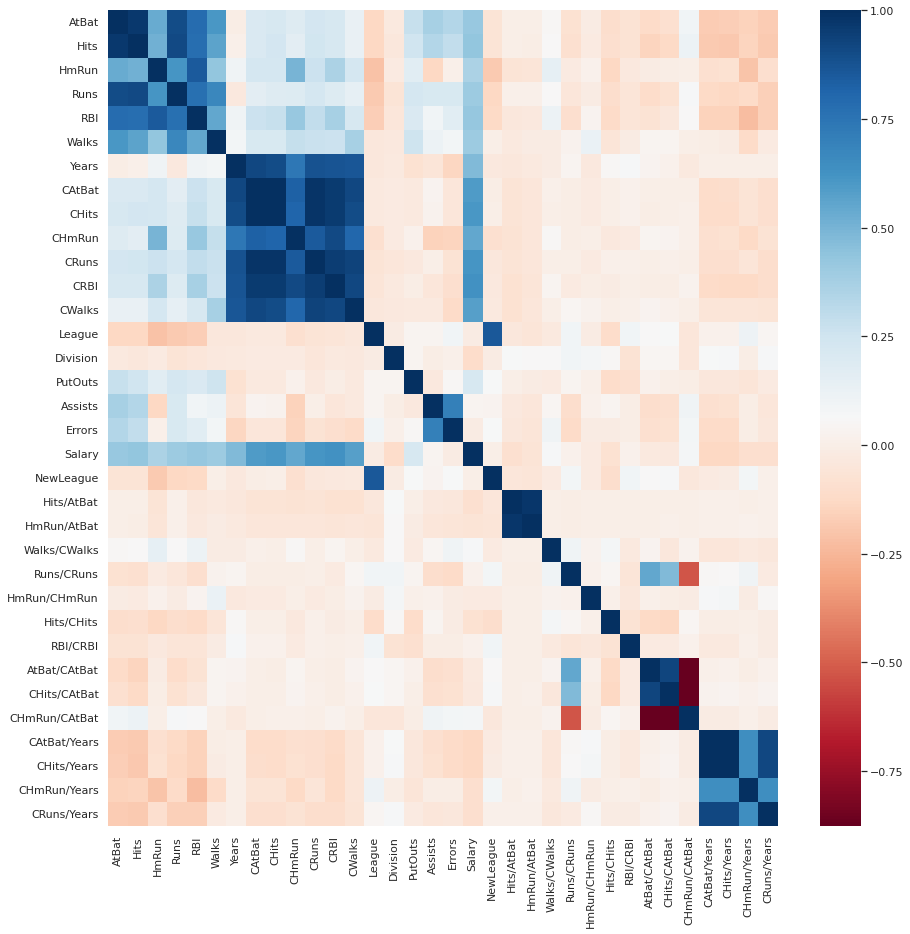

['Hits',
 'Runs',
 'RBI',
 'CAtBat',
 'CHits',
 'CHmRun',
 'CRuns',
 'CRBI',
 'CWalks',
 'Errors',
 'NewLeague',
 'HmRun/AtBat',
 'CHits/CAtBat',
 'CHmRun/CAtBat',
 'CHits/Years',
 'CRuns/Years']

In [291]:
### KORELASYON ANALİZİ

def high_correlated_cols(dataframe, plot=False, corr_th=0.70):
    corr = dataframe.corr()
    cor_matrix = corr.abs()
    upper_triangle_matrix = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(np.bool))
    drop_list = [col for col in upper_triangle_matrix.columns if any(upper_triangle_matrix[col] > corr_th)]
    if plot:
        import seaborn as sns
        import matplotlib.pyplot as plt
        sns.set(rc={'figure.figsize': (15, 15)})
        sns.heatmap(corr, cmap="RdBu")
        plt.show()
    return drop_list

high_correlated_cols(df, plot=True)

In [292]:
## FINAL MODEL

y = df["Salary"]
X = df.drop(["Salary"], axis=1)

models = [('LR', LinearRegression()),
          ("Ridge", Ridge()),
          ("Lasso", Lasso()),
          ("ElasticNet", ElasticNet()),
          ('KNN', KNeighborsRegressor()),
          ('CART', DecisionTreeRegressor()),
          ('RF', RandomForestRegressor()),
          ('SVR', SVR()),
          ('GBM', GradientBoostingRegressor()),
          ("XGBoost", XGBRegressor(objective='reg:squarederror')),
          ("LightGBM", LGBMRegressor()),
          ("CatBoost", CatBoostRegressor(verbose=False))]

for name, regressor in models:
    rmse = np.mean(np.sqrt(-cross_val_score(regressor, X, y, cv=10, scoring="neg_mean_squared_error")))
    print(f"RMSE: {round(rmse, 4)} ({name}) ")

RMSE: 317.0524 (LR) 
RMSE: 328.6763 (Ridge) 
RMSE: 332.0954 (Lasso) 
RMSE: 349.9535 (ElasticNet) 
RMSE: 259.5944 (KNN) 
RMSE: 254.3203 (CART) 
RMSE: 190.5609 (RF) 
RMSE: 347.8928 (SVR) 
RMSE: 192.3289 (GBM) 
RMSE: 202.9164 (XGBoost) 
RMSE: 193.6744 (LightGBM) 
RMSE: 184.6965 (CatBoost) 


In [ ]:
cart_params = {'max_depth': range(1, 20),
               "min_samples_split": range(2, 30)}

rf_params = {"max_depth": [5, 8, 15, None],
             "max_features": [5, 7, "auto"],
             "min_samples_split": [8, 15, 20],
             "n_estimators": [200, 500, 1000]}

xgboost_params = {"learning_rate": [0.1, 0.01, 0.01],
                  "max_depth": [5, 8, 12, 20],
                  "n_estimators": [100, 200, 300, 500],
                  "colsample_bytree": [0.5, 0.8, 1]}

lightgbm_params = {"learning_rate": [0.01, 0.1, 0.001],
                   "n_estimators": [300, 500, 1500],
                   "colsample_bytree": [0.5, 0.7, 1]}

regressors = [("CART", DecisionTreeRegressor(), cart_params),
              ("RF", RandomForestRegressor(), rf_params),
              ('XGBoost', XGBRegressor(objective='reg:squarederror'), xgboost_params),
              ('LightGBM', LGBMRegressor(), lightgbm_params)]

best_models = {}

for name, regressor, params in regressors:
    print(f"########## {name} ##########")
    rmse = np.mean(np.sqrt(-cross_val_score(regressor, X, y, cv=10, scoring="neg_mean_squared_error")))
    print(f"RMSE: {round(rmse, 4)} ({name}) ")

    gs_best = GridSearchCV(regressor, params, cv=3, n_jobs=-1, verbose=False).fit(X, y)

    final_model = regressor.set_params(**gs_best.best_params_)
    rmse = np.mean(np.sqrt(-cross_val_score(final_model, X, y, cv=10, scoring="neg_mean_squared_error")))
    print(f"RMSE (After): {round(rmse, 4)} ({name}) ")

    print(f"{name} best params: {gs_best.best_params_}", end="\n\n")

    best_models[name] = final_model

In [ ]:
########## CART ##########
## RMSE: 258.2662 (CART)
## RMSE (After): 228.2847 (CART)
## CART best params: {'max_depth': 6, 'min_samples_split': 24}
########## RF ##########
## RMSE: 193.0875 (RF)
## RMSE (After): 193.2344 (RF)
## RF best params: {'max_depth': 8, 'max_features': 7, 'min_samples_split': 8, 'n_estimators': 500}
########## XGBoost ##########
## RMSE: 202.9164 (XGBoost)
## RMSE (After): 194.198 (XGBoost)
## XGBoost best params: {'colsample_bytree': 0.5, 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 500}
########## LightGBM ##########
## RMSE: 193.6744 (LightGBM)
## RMSE (After): 190.2554 (LightGBM)
## LightGBM best params: {'colsample_bytree': 0.5, 'learning_rate': 0.01, 'n_estimators': 500}